In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Q（1）
Write your own code to implement a SOM that maps a 1-dimensional output layer 
of 36 neurons to a “sinusoid curve”. Display the trained weights of each output neuron 
as points in a 2D plane, and plot lines to connect every topological adjacent neurons
(e.g. the 2nd neuron is connected to the 1st and 3rd neuron by lines).

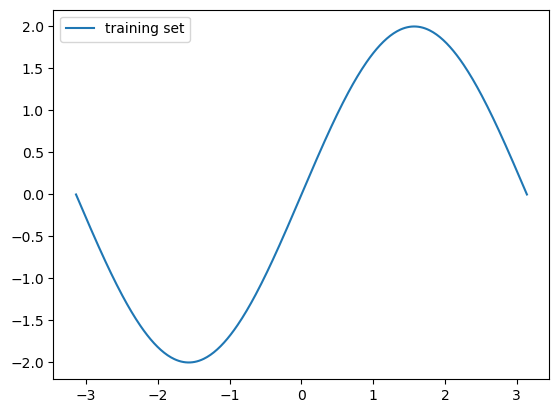

In [107]:
### input sample generation
x = np.linspace(-np.pi,np.pi,400)
y_label = 2*np.sin(x)
X_train = np.zeros((400,2))
X_train[:,0] = x
X_train[:,1] = y_label
plt.plot(X_train[:,0] ,X_train[:,1],label = 'training set')
plt.legend(loc = 'best')

In [108]:
def update_weights(xi, weights, BMU_idx, sigma):
    n=0.1
    for i in range (weights.shape[0]):
        hij = np.exp(-np.linalg.norm([i-BMU_idx],ord =2)**2/(2*sigma**2))
        weights[i] += n*hij*(xi-weights[i])
    return weights

def find_BMU(xi, weights):
    BMU_idx = np.argmin(np.linalg.norm(xi-weights))
    dis=[]
    for i in range (weights.shape[0]):
        distance = np.linalg.norm(xi-weights[i])
        dis.append(distance)
        
    return np.argmin(dis) 

In [145]:
## iitializa weights randomly
random.seed(44)
weights = 0.03*np.random.rand(36,2)
epoch = 600

for epoch in range(epoch):
    #for idx,xi in enumerate(X_train):
    idx = random.randint(0,400-1)
    xi = X_train[idx]
    sigma = 5.34*np.exp(-epoch*np.log(18)/2000)
    w_idx = find_BMU(xi,weights)
    weights = update_weights( xi, weights, w_idx, sigma)

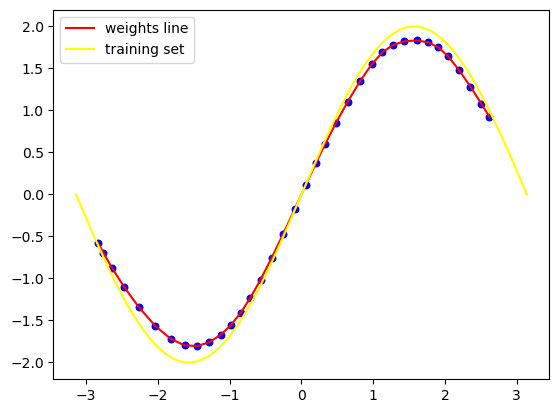

In [146]:
plt.scatter(weights[:,0],weights[:,1], s=22,color = 'blue')
plt.plot(weights[:,0],weights[:,1] , color = 'red',label = 'weights line')
plt.plot(X_train[:,0] ,X_train[:,1],label = 'training set',color = 'yellow')
plt.legend()

399


## Q(2)
Write your own code to implement a SOM that maps a 2-dimensional output layer 
of 36 (i.e. 6×6) neurons to a “circle”. Display the trained weights of each output neuron 
as a point in the 2D plane, and plot lines to connect every topological adjacent neurons
(e.g. neuron (2,2) is connected to neuron (1,2) (2,3) (3,2) (2,1) by lines)

(-1.2, 1.2)

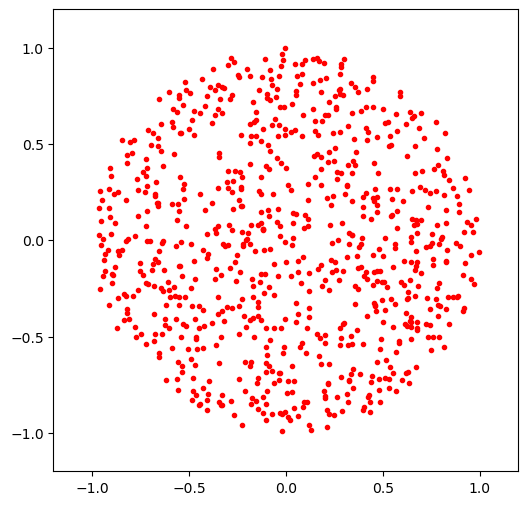

In [147]:
def getCircle(r, points):        
        x_list = []
        y_list = []
        
        for k in range(points):
            random_theta = random.random() * math.pi * 2
            random_r = math.sqrt(random.random()) * r
            x = np.cos(random_theta) * random_r
            y = np.sin(random_theta) * random_r
            x_list.append(x)
            y_list.append(y)
        return x_list, y_list
x,y = getCircle(1, 800)
trainingset = np.zeros((800,2))
trainingset[:,0] = x
trainingset[:,1] = y

plt.figure(figsize=(6,6))
plt.scatter(trainingset[:,0],trainingset[:,1],marker='.',c='r')
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)

In [148]:
def update_weights_circle(xi, weights, BMU_idx_2d, sigma):
    n=0.1
    for i in range (weights.shape[0]):
        i_2d = np.array([i//6, i%6])
        hij = np.exp(-np.linalg.norm([i_2d-BMU_idx_2d],ord =2)**2/(2*sigma**2))
        weights[i] += n*hij*(xi-weights[i])
    return weights

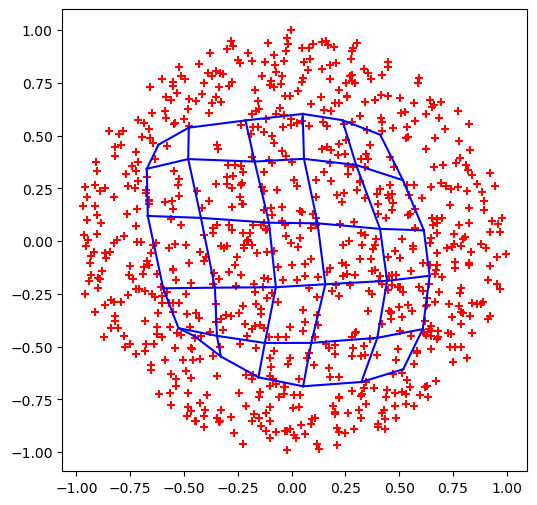

In [166]:
random.seed(33)
weights = 0.1*np.random.rand(36,2)-0.01
epoch = 600

for epoch in range(epoch):
    #for idx,xi in enumerate(trainingset):
    sigma = 1.5*np.exp(-epoch*np.log(7)/2000)
    idx = random.randint(0,800-1)
    xi = trainingset[idx]
    w_idx = find_BMU(xi,weights)
    W_idx_2d = np.array([w_idx//6, w_idx%6])
    weights = update_weights_circle( xi, weights, W_idx_2d, sigma)

# plot
plt.figure(figsize=(6,6))
for i in range(6):
    for j in range(5):
        plt.plot([weights[i*6+j][0],weights[i*6+j+1][0]],[weights[i*6+j][1],weights[i*6+j+1][1]],c='b')
        plt.plot([weights[i+j*6][0],weights[i+(j+1)*6][0]],[weights[i+j*6][1],weights[i+(j+1)*6][1]],c='b')
plt.scatter(trainingset[:,0],trainingset[:,1],marker='+',c='r')

## Q(3)
